
## What we have learnt so far:

1. Introduction to Python: Numbers, lists, while,...

2. `if` and `for` - control flows and loops

3. Handling data in python using `pandas DataFrames`

> For more information about `pandas DataFrames`, have a look into the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

Before we start with a meteorological data set, we will give an example with the population of Europe's capitals. 

In [1]:
# First, let's import all the needed libraries. 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

## Recall: `pandas DataFrames`

In [2]:
## exemplary dataframe 

cities = {"name": ["London", "Berlin", "Madrid", "Rome", 
                   "Paris", "Vienna", "Bucharest", "Hamburg", 
                   "Budapest", "Warsaw", "Barcelona", 
                   "Munich", "Milan"],
          "population": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1740119, 1602386, 1493900,
                         1350680],
          "country": ["England", "Germany", "Spain", "Italy",
                      "France", "Austria", "Romania", 
                      "Germany", "Hungary", "Poland", "Spain",
                      "Germany", "Italy"]}
df_city = pd.DataFrame(cities)
print(df_city)


### Mean of a single column
mean = df_city['population'].mean()
## Variance: 
variance = df_city['population'].var()
## Median
median = df_city['population'].median()

df_city

         name  population  country
0      London     8615246  England
1      Berlin     3562166  Germany
2      Madrid     3165235    Spain
3        Rome     2874038    Italy
4       Paris     2273305   France
5      Vienna     1805681  Austria
6   Bucharest     1803425  Romania
7     Hamburg     1760433  Germany
8    Budapest     1754000  Hungary
9      Warsaw     1740119   Poland
10  Barcelona     1602386    Spain
11     Munich     1493900  Germany
12      Milan     1350680    Italy


,name,population,country
0,London,8615246,England
1,Berlin,3562166,Germany
2,Madrid,3165235,Spain
3,Rome,2874038,Italy
4,Paris,2273305,France
5,Vienna,1805681,Austria
6,Bucharest,1803425,Romania
7,Hamburg,1760433,Germany
8,Budapest,1754000,Hungary
9,Warsaw,1740119,Poland



****

# 4  Linear Regression

***

[Regression](https://en.wikipedia.org/wiki/Regression_analysis) analysis is a statistical process for estimating the relationships between two or more variables. The relationship is modeled as $y \sim x$ or $y = f(x)$. Both model descriptions indicate  that the variable $y$ is a function  of $x$. Therefore the variable $y$ is denoted as **response variable** or **dependent variable**, whereas the variable $x$ is denoted as **predictor variable** or **independent variable**. 

***

## 4.1 Simple Linear Regression

In this section we discuss a special type of regression, which is called [**simple linear regression**](https://en.wikipedia.org/wiki/Simple_linear_regression). In this special case of  regression analysis the relationship between the response variable $y$ and and the predictor variable $x$ is given in form of a **linear** equation

$$y= a + bx\text{,}$$
where $a$ and $b$ are constants. The number $a$ is called **intercept** and defines the point of intersection of the line  and the $y$-axis ($x=0$). The number $b$ is called **regression coefficient**. It is a measure of the slope of the **regression line**. Thus, $b$ indicates how much the $y$-value changes when the $x$-value increases by 1 unit. The adjective **simple** refers to the fact that the outcome variable is related to a single predictor. The model is considered as a **deterministic model**, as it gives an exact relationship between $x$ and $y$.

Let us consider a simple example. Given a population of $n = 3$ points with Cartesian coordinates $(x_i,y_i)$ of $(1,6)$, $(2,8)$ and $(3,10)$. These points plot on a straight line and thus, can be described by a linear equation model in the form of $y= a + bx$, where the intercept $a=4$ and $b=2$. 




<div>
<img src="4_regression_figures/Regression.png" width="600"/>
</div>

***

In many cases, the relationship between two variables $x$ and $y$ is not exact. This is due to the fact, that the response variable $y$ is affect by other unknown and/or random processes, that are not fully captured by the predictor variable $x$. In such a case the data points do not line up on a straight line. However, the data still may follow an underlying linear relationship. In order to take these unknowns into consideration a **random error term**, denoted by $\epsilon$, is added to the linear model equation, thus resulting in a **probabilistic model** in contrast to the deterministic model from above.

$$y = a + b x + \epsilon$$

where the error term $\epsilon_i$ is assumed to consist of independent normal distributed values, $e_i \sim N(0, \sigma^2)$.


In linear regression modelling following assumptions are made about the model (Mann 2012).

* The random error term $\epsilon$ has a mean equal to zero for each $x$.  
* The errors associated with different observations are independent. 
* For any given $x$, the distribution of errors is normal. 
* The distribution errors for each $x$ has the same (constant) standard deviation, which is denoted by $\sigma_{\epsilon}$.

***

Let us consider another example. This time we take a random sample of sample size $n = 8$ from a population. In  order to emphasis that the values of the intercept and slope are calculated from sample data, $a$ and $b$ are denoted by $\beta_0$ and $\beta_1$, respectively. In addition, the error term $\epsilon$ is denoted as $e$. Thus, $\beta_0$, $\beta_1$ and $e$ are estimates based on sample data for the population parameters $a$, $b$ and $\epsilon$. 

$$\hat y = \beta_0 + \beta_1 x + e \text{,}$$

where $\hat y$ is the the **estimated or predicted value of $y$** for any given value of $x$.


<div>
<img src="4_regression_figures/Regression-2.png" width="600"/>
</div>

The error $e_i$ for each particular pair of values ($x_i,y_i$), also called **residual**, is computed by the difference of the observed value $y_i$ and the predicted value given by $\hat y_i$.

$$e_i = y_i - \hat y_i$$

Depending on the data $e_i$ is a negative number if $y_i$ plots below the regression line or it is a positive number if $y_i$ plots above the regression line.

***

### 4.1.1 Parameter Estimation: Ordinary Least Squares Method

Now, as we relaxed the constraints of the deterministic model and introduced an error term $\epsilon$, we run into another problem. There are infinitely many regression lines that fulfill the specifications of the probabilistic model. 


<div>
<img src="4_regression_figures/Regression-3.png" width="600"/>
</div>

Obviously, we need a strategy to select that particular regression line, which corresponds to the *best* model in order to describe the data. In this section we discuss on one of the most popular methods to achieve that task, the so called [**ordinary least squares method (OLS)**](https://en.wikipedia.org/wiki/Ordinary_least_squares).

As mentioned in the previous section for each particular pair of values $(x_1,y_1)$ the error $e_i$ is calculated by $y_1-\hat y$. In order to get the best fitting line for the given data the **error sum of squares**, denoted by SSE, is minimized.

$$SSE = \sum_{i=1}^n e_i^2=\sum_{i=1}^n (y - \hat y)^2$$

For the simple linear model there exists an analytic solution for $\beta_1$.

$$\hat{\beta_1} = \frac{\sum_{i=1}^n ((x_i- \bar x) (y_i-\bar y))}{\sum_{i=1}^n (x_i-\bar x)^2} = \frac{cov(x,y)}{var(x)}\text{,}$$
and $\beta_0$.

$$\hat{\beta_0} = \bar y -\hat{\beta_1} \bar x$$

The OLS gives the maximum likelihood estimate for $\hat{\beta}$ when the parameters have equal variance and are uncorrelated, and the residuals $\epsilon$ are uncorrelated and follow a Gaussian distribution ([homoscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity)).

***

## 4.2 Simple Linear Regression: An example

In order to get some hands-on experience we apply the **simple linear regression** in an exercise. 


***

For this example, we will use a daily time series from the DWD weather station Berlin-Dahlem (FU), downloaded from [Climate Data Center](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/kl/historical/tageswerte_KL_00403_19500101_20211231_hist.zip) on 2022-07-22. A detailed description of the variables is available [here](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/kl/historical/DESCRIPTION_obsgermany_climate_daily_kl_historical_en.pdf). For the purpose of this tutorial the dataset is provided [here](https://userpage.fu-berlin.de/soga/data/raw-data/tageswerte_KL_00403_19500101_20211231_hist.zip).

You find a documentation of this data in [german](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/kl/historical/BESCHREIBUNG_obsgermany_climate_daily_kl_historical_de.pdf) and  [english](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/kl/historical/DESCRIPTION_obsgermany_climate_daily_kl_historical_en.pdf).


In [3]:
import requests, zipfile, io

url = "http://userpage.fu-berlin.de/soga/soga-py/300/307000_time_series/tageswerte_KL_00403_19500101_20211231_hist.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extract("produkt_klima_tag_19500101_20211231_00403.txt", "../data")
data_raw = pd.read_csv(
    "../data/produkt_klima_tag_19500101_20211231_00403.txt",
    sep=";",
    na_values=["-999"],
    skipinitialspace=True
)
data_raw

,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
0,403,19500101,NaN,NaN,NaN,5,2.2,7,NaN,0.0,5.0,4.0,1025.60,-3.2,83.00,-1.1,-4.9,-6.3,eor
1,403,19500102,NaN,NaN,NaN,5,12.6,8,NaN,0.0,8.0,6.1,1005.60,1.0,95.00,2.2,-3.7,-5.3,eor
2,403,19500103,NaN,NaN,NaN,5,0.5,1,NaN,0.0,5.0,6.5,996.60,2.8,86.00,3.9,1.7,-1.4,eor
3,403,19500104,NaN,NaN,NaN,5,0.5,7,NaN,0.0,7.7,5.2,999.50,-0.1,85.00,2.1,-0.9,-2.3,eor
4,403,19500105,NaN,NaN,NaN,5,10.3,7,NaN,0.0,8.0,4.0,1001.10,-2.8,79.00,-0.9,-3.3,-5.2,eor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26293,403,20211227,NaN,NaN,NaN,3,0.0,8,0.183,0.0,5.9,3.8,998.13,-3.7,79.67,-0.7,-7.9,-9.9,eor
26294,403,20211228,NaN,NaN,NaN,3,1.5,6,0.000,0.0,6.4,5.3,990.17,-0.5,88.46,2.7,-3.9,-5.1,eor
26295,403,20211229,NaN,NaN,NaN,3,0.3,6,0.000,0.0,7.5,8.2,994.40,4.0,100.00,5.6,1.8,0.0,eor
26296,403,20211230,NaN,NaN,NaN,3,3.2,6,0.000,0.0,7.9,11.5,1001.70,9.0,98.54,12.7,4.6,2.3,eor


### 4.2.1 Remove unnecessary columns

By looking at the data and consulting the variable description, we can immediately find variables that are not useful for our purpose and drop them.
- STATIONS_ID -> There is only one station in the data.
- MESS_DATUM -> Since we are not interested in a time series analysis, this is just a numbering of the rows.
- QN_3, FX, FM, eor -> These variables do not contain any data.
- QN_4 -> This value is a data quality label and has no relation to weather data.

In [4]:
df = data_raw.drop(columns=["STATIONS_ID", "MESS_DATUM", "QN_3", "FX", "FM", "NM", "eor", "QN_4","RSK","RSKF",'SHK_TAG',"SDK","UPM","VPM"])
df


,PM,TMK,TXK,TNK,TGK
0,1025.60,-3.2,-1.1,-4.9,-6.3
1,1005.60,1.0,2.2,-3.7,-5.3
2,996.60,2.8,3.9,1.7,-1.4
3,999.50,-0.1,2.1,-0.9,-2.3
4,1001.10,-2.8,-0.9,-3.3,-5.2
...,...,...,...,...,...
26293,998.13,-3.7,-0.7,-7.9,-9.9
26294,990.17,-0.5,2.7,-3.9,-5.1
26295,994.40,4.0,5.6,1.8,0.0
26296,1001.70,9.0,12.7,4.6,2.3


### 4.2.2 Rename columns for convenience

To improve the readability, we rename the remaining columns.

In [5]:
df = df.rename(columns={"PM": "pres",
                            "TMK": "temp",
                            "TXK": "temp_max",
                            "TNK": "temp_min",
                            "TGK": "temp_sfc"})
df

,pres,temp,temp_max,temp_min,temp_sfc
0,1025.60,-3.2,-1.1,-4.9,-6.3
1,1005.60,1.0,2.2,-3.7,-5.3
2,996.60,2.8,3.9,1.7,-1.4
3,999.50,-0.1,2.1,-0.9,-2.3
4,1001.10,-2.8,-0.9,-3.3,-5.2
...,...,...,...,...,...
26293,998.13,-3.7,-0.7,-7.9,-9.9
26294,990.17,-0.5,2.7,-3.9,-5.1
26295,994.40,4.0,5.6,1.8,0.0
26296,1001.70,9.0,12.7,4.6,2.3


### 4.2.3 Pairplot and distributions of the data



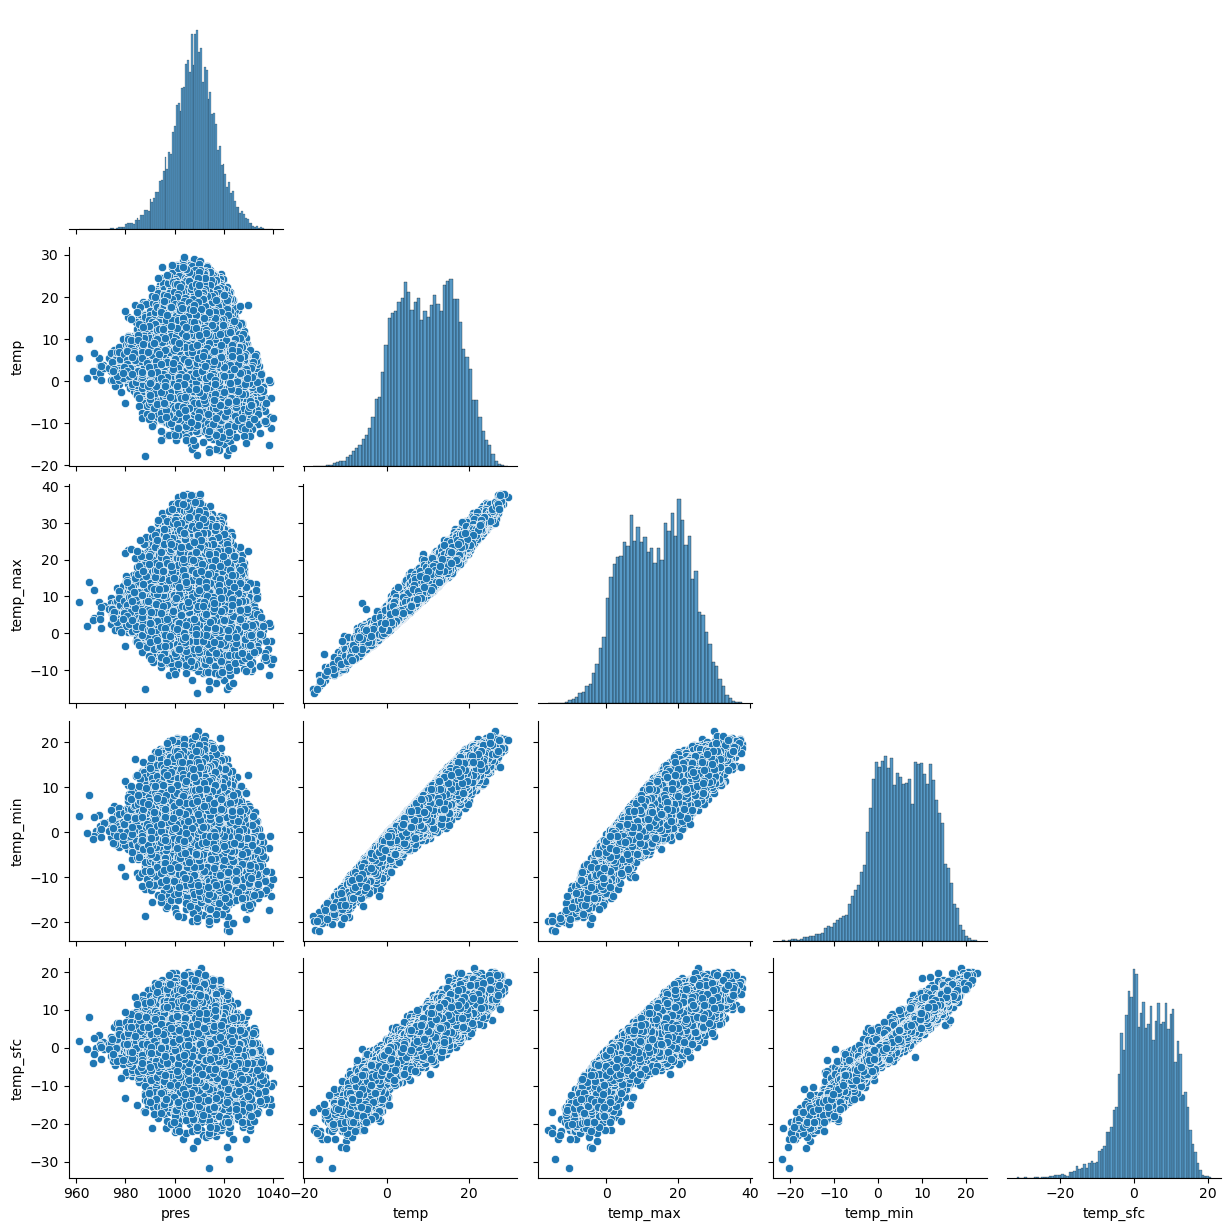

In [6]:
sns.pairplot(df, corner=True)
plt.show()

Now, we got an impression of the distributions and relations of the different features. We notice a strong reration between different temperature variables. 


### 4.2.4 Drop missing data

As a next step, we check the data for missing values.

In [7]:
df.isnull().sum()

pres        0
temp        0
temp_max    0
temp_min    0
temp_sfc    8
dtype: int64

As we can see, the percentage of missing values in our data is very small (148 out of 26298 rows). Therefore, the simplest solution is to simply drop all rows with missing data. If the percentage were higher, other solutions might be more useful, such as **imputing values** for the missing values. Read more about dealing with [zero missings here](https://www.geo.fu-berlin.de/en/v/soga-py/Advanced-statistics/Feature-scales/Zero-Missings/index.html).

In [8]:
df.dropna(axis=0, inplace=True)
df

,pres,temp,temp_max,temp_min,temp_sfc
0,1025.60,-3.2,-1.1,-4.9,-6.3
1,1005.60,1.0,2.2,-3.7,-5.3
2,996.60,2.8,3.9,1.7,-1.4
3,999.50,-0.1,2.1,-0.9,-2.3
4,1001.10,-2.8,-0.9,-3.3,-5.2
...,...,...,...,...,...
26293,998.13,-3.7,-0.7,-7.9,-9.9
26294,990.17,-0.5,2.7,-3.9,-5.1
26295,994.40,4.0,5.6,1.8,0.0
26296,1001.70,9.0,12.7,4.6,2.3


In [9]:
df.describe()

,pres,temp,temp_max,temp_min,temp_sfc
count,26290.000000,26290.00000,26290.000000,26290.000000,26290.000000
mean,1007.808868,9.36466,13.520822,5.365135,3.667554
std,9.132328,7.62621,8.969154,6.730699,6.793801
min,961.000000,-17.90000,-16.400000,-21.800000,-31.600000
25%,1002.300000,3.60000,6.400000,0.500000,-0.900000
50%,1008.200000,9.50000,13.600000,5.500000,3.700000
75%,1013.700000,15.40000,20.600000,10.700000,9.000000
max,1040.000000,29.50000,37.900000,22.500000,21.000000


We notice the the range of the data differs! Often, we need data of the same scale for appropriate modelling. Therefore, we explain min-max scaling. Moreover, a lot of data sets are not normally distributed. But they need to be normally distributed to e.g. calculate the correlations in a mathematical correct way. 

### 4.2.5 Feature scaling
 
In the next steps it is exaplained how to transform the data to make the different variables (feature) comparable with each other **min-max scaling** and **logistic transformation** which transforms e.g. skew-symmetric data to a normally distributed data set.
We comment the code, because our data is normally distributed. But you need it later for dealing with different data. 

###  Min-Max scaling

The min-max scaling

$$x'=\frac{x-x_{min}}{x_{max}-x_{min}}$$


transforms the data into the range $[0,1]$. We want to avoid getting values with 0, because in the second step we need the logarithm of the values. Therefore, we use slightly larger boundary values $x_{min}-1$ and $x_{max}+1$. Thus

$$x'=\frac{x-x_{min}+1}{x_{max}-x_{min}+2\, .}$$




In [10]:

#min-max Scaling (s.workflow)
#transform_cols = ["temp", "temp_max", "temp_min", "temp_sfc"] # ["COLUMN NAME", "COLUMN NAME"]

#df_transfo  =df.copy() # set an equivalent copy to perform the feature scales transformation

#xmin = df[transform_cols].min()
#xmax =  df[transform_cols].max()

# transform each column by its indiv. min/max
#df_transfo[transform_cols] = (df_transfo[transform_cols] - xmin + 1) / (xmax - xmin + 2)


### Logistic transformation

As a second step, we use a logistic transformation
$$x''=\log\frac{x'}{1-x'}$$

However, before we can start the transformation, we face a problem! Because we have transformed the test set with the values of the training set, the test set may contain values outside the range [0,1]. This will not work with the logarithm in the transformation.

In [11]:
#print(df_transfo[df_transfo[transform_cols].le(0).any(axis=1)])
#print(df_transfo[df_transfo[transform_cols].ge(1).any(axis=1)])


As we can see, there is no value below 0 in the test set. 

If there is a value below 0: We basically have two options: either drop the data or impute new values. If we only have one problematic data set, we will drop it. For imputation, we could assign the minimum possible value to the problematic values. To do so, see the uncommented line below. 

In [12]:
# df.drop(df[df[transform_cols].le(0).any(axis=1) | df[df].ge(1).any(axis=1)].index, inplace=True)

In [13]:
# Perform a logistic transformation on x′∈]0,1[ℝ

#df_transfo[transform_cols] = np.log(df_transfo[transform_cols] / (1 - df_transfo[transform_cols]))

Now we are ready to check our distributions again. We will plot all variables as histogram next to each other like so:

In [14]:
#df_transfo[transform_cols].hist(bins=35, figsize=(9, 6))
#plt.show()

In [15]:
#df.hist()

### Back transformation

The back transformation is the “logistic” function resp. inverse logit:

\begin{align}
x''\to x'=\frac{e^{x''}}{1+e^{x''}}&& and &&
x'\to x=(x'+l)\cdot(u-l)
\end{align}

\begin{align}
&& resp. && 
x'\to x= ({x'+x_{min}+1})\cdot(x_{max}-x_{min}+2)
\end{align}

In [16]:
# backtransform
## reverse min max und perform exp()
## (xmin+1)+(xmax-xmin+2)*np.exp(df_transfo)/(1+np.exp(df_transfo))

> **Exercise A:**
>
> Write function (`def ():...`) that log transforms your data including a prior Min-Max-Scaling. This way we can generalise our approach well to new unseen data! (e.g. call it `logistic_min_max()` function). 

> **Exercise B:**
>
> The same way provide a function that back transformations this “logistic” function, resp. inverse logit! (call it `inv_logit()` function)

In [17]:
### your code here ###

### 4.2.6 statistics - mean, median, distributions

Now, we may compute statistics :) 

In [18]:
## calculate mean on original data: 
df.mean(), df.median()

(pres        1007.808868
 temp           9.364660
 temp_max      13.520822
 temp_min       5.365135
 temp_sfc       3.667554
 dtype: float64,
 pres        1008.2
 temp           9.5
 temp_max      13.6
 temp_min       5.5
 temp_sfc       3.7
 dtype: float64)

In [19]:
## calculate mean on transformed data: 

In [20]:
#mean_log = (xmin+1)+(xmax-xmin+2)*np.exp(df_transfo[transform_cols].mean())/(1+np.exp(df_transfo[transform_cols].mean()))

#mean_log

In [21]:
#median_log = (xmin+1)+(xmax-xmin+2)*np.exp(df_transfo[transform_cols].median())/(1+np.exp(df_transfo[transform_cols].median()))

#median_log

> **Exercise C**:
> 
> Take a further feature from the data set, which is not normally distributed. Compare the mean, median and standard deviation of all variabels between original untransformed data and the back transformed mean, median and standard deviation of the log transformed data. Do you notice any difference?


In [22]:
### your code here ###

#### Subsetting a `pandas DataFrame`

> We can calculate with a subset of a data set by using pandas "iloc":
> Remember that we start counting at 0! To consider the values of the pressure we locate the first column
> and all rows:


In [23]:
### your code here ###


In order to showcase the **simple linear regression** we examine the relationship between two variables, the minimum temperature provided within the dataset as the predictor variable, and the maximum temperature as the response variable.

***

### 4.2.7. Drawing a sample

For data preparation we randomly sample `50` time steps from the data set and build a data frame with the two variables of interest. Further we use the module ` matplotlib.pyplot` to plot the data in form of a scatter plot to visualize the underlying linear relationship between the two variables.

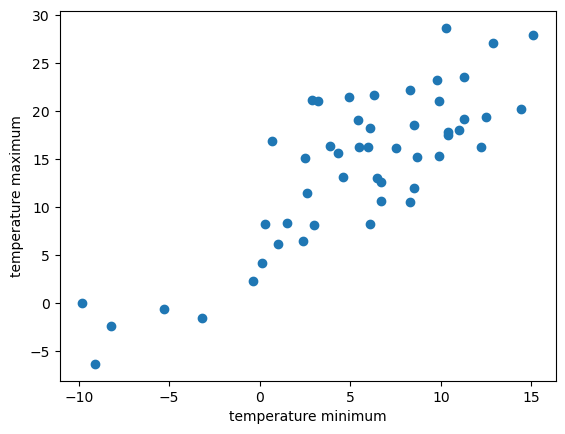

In [24]:
df_sample = df.sample(n=50, replace=False, random_state=1)

x_sample = df_sample.loc[ : , 'temp_min']
y_sample = df_sample.loc[ : , 'temp_max']


import matplotlib.pyplot as plt

plt.xlabel('temperature minimum')
plt.ylabel('temperature maximum')
plt.scatter(x_sample,y_sample)

The visual inspection confirms our assumption that the relationship between the minimun and the maximum temperature variables is roughly linear. In other words, with increasing maximum temperature the minimum temperature tends to increase.

*** 

### 4.2.8. Parameter estimation

 **Solving for $\beta_0$ and  $\beta_1$ analytically in Python**

As shown in the previous section the parameter $\beta_0$ and $\beta_1$ of a simple linear model may be calculated analytically. Recall the equation for a linear model from sample data

$$\hat y = \beta_0 + \beta_1 x + e \text{,}$$

for $\beta_1$

$$\hat{\beta_1} = \frac{\sum_{i=1}^n ((x_i- \bar x) (y_i-\bar y))}{\sum_{i=1}^n (x_i-\bar x)^2} = \frac{cov(x,y)}{var(x)}\text{,}$$

and $\beta_0$.

$$\hat{\beta_0} = \bar y -\hat{\beta_1} \bar x$$

For a better understanding we use Python to calculate the individual terms using numpy

In [25]:
import numpy as np

# Calculate b1

x = df.loc[ : , 'temp_min']
y = df.loc[ : , 'temp_max']

x_bar = np.mean(x)
y_bar = np.mean(y)

b1 = np.sum((x-x_bar)*(y-y_bar)) / np.sum((x-x_bar)**2)
print('b1 =',b1)

b1 = 1.2105022692591816


The slope of the regression model is approximately `b1`. For a sanity check we calculate the ratio of the covariance of $x$ and $y$, applying the `cov()` function, and the variance of $x$, using the `var()` function and compare it to the result from above. 

In [26]:
np.cov(x,y)[0][1]/np.var(x)

1.210548315220198

A great match!

Further, we calculate $\beta_0$.

In [27]:
# Calculate b0
b0 = y_bar - b1*x_bar
b0

7.026313473653632

The intercept $\beta_0$ of the regression model is approximately `7`.

Thus we can write down the regression model

$$\text{temperature maximum} = 7 + 1,21\times \text{temperature minimum} $$

Now, based on that equation we may determine the maximum temperature given its minimum temperature. Let us predict the temperature maximum at times where the temperature minimum `0, 5, 10` degrees. 

In [28]:
temp_0 = b0+b1*0
temp_5 = b0+b1*5
temp_10 = b0+b1*10

print(' Das prognostizierte Temperaturmaximum bei einem Temp. Minimum von 0 Grad C ist ',temp_0, 'C')
print(' Das prognostizierte Temperaturmaximum bei einem Temp. Minimum von 5 Grad C ist ',temp_5, 'C')
print(' Das prognostizierte Temperaturmaximum bei einem Temp. Minimum von 10 Grad C ist ',temp_10, 'C')

 Das prognostizierte Temperaturmaximum bei einem Temp. Minimum von 0 Grad C ist  7.026313473653632 C
 Das prognostizierte Temperaturmaximum bei einem Temp. Minimum von 5 Grad C ist  13.07882481994954 C
 Das prognostizierte Temperaturmaximum bei einem Temp. Minimum von 10 Grad C ist  19.131336166245447 C



*** 

#### Using Python' `sklearn.linear_model` to calculate $\beta_0$ and $\beta_1$

See also the more detailed explanations in https://realpython.com/linear-regression-in-python/

First, import the class `sklearn.linear_model.LinearRegressio` to perform linear and polynomial regression and make predictions accordingly

The second step is defining data to work with. The inputs (regressors, predictor variable, independent variable 𝑥) and output (predictor, dependent variable 𝑦) should be arrays (the instances of the class numpy.ndarray) or similar objects. This is the simplest way of providing data for regression:


In [29]:
from sklearn.linear_model import LinearRegression

x = df['temp_min'].values
y = df['temp_max'].values

print(x.shape, y.shape)

# we have to reshape the regressors x
x = x.reshape((-1, 1))

print(x.shape, y.shape)

# set up the linear model
model = LinearRegression()

# find the linear function that fits the min/max temperature best:
model.fit(x, y)

ModuleNotFoundError: No module named 'sklearn'

Let us look at the just calculated interception and slope of the linear equation:

In [51]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 7.026313473653561
slope: [1.21050227]


***


### 4.2.9 Predicting

 
Now, we have the linear model to predict the maximum temperature of randomly picked data point. We test if we get the same results as above and calculate the maximum temperature at minimal temperatures of 0, 5 and 10 $°C$.

In [52]:
sample_minTemp = np.array([0,5,10])

y_pred = model.intercept_ + model.coef_ * sample_minTemp
print(y_pred)

[ 7.02631347 13.07882482 19.13133617]



We can also use `.predict()` to pass the regressor as the argument and get the corresponding predicted response. We first have to reshape the `sample_minTemp`:

In [53]:
sample_minTemp = sample_minTemp.reshape((-1, 1))

y_pred = model.predict(sample_minTemp)

print(y_pred)

[ 7.02631347 13.07882482 19.13133617]


***

Take a look at the scatter plot again and let us plot the regression line into the scatter plot. We define a function that will plot the scatter plot of the minimum/maximum temperature of the DWD data set. 

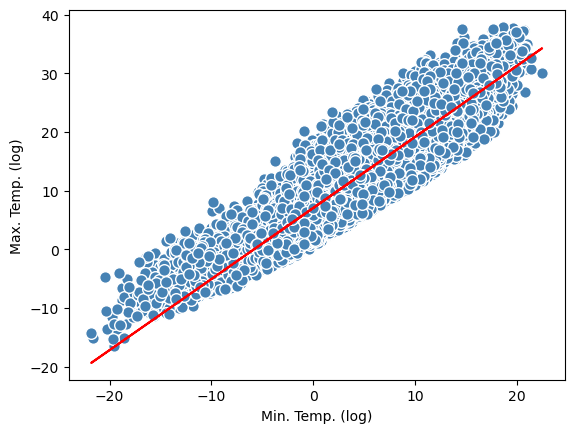

In [54]:
plt.scatter(x,y,c='steelblue', edgecolor = 'white',s=70)
plt.xlabel("Min. Temp. (log)")
plt.ylabel("Max. Temp. (log)")
# linear regression line: 
y_pred = model.predict(x)
plt.plot(x,y_pred, color = 'red')

Yes! We get the same results as above, where we calculated the intercept and the slope manually!


****



## 4.3. Model diagnostic

[**Regression validation**](https://en.wikipedia.org/wiki/Regression_validation) or [**regression diagnostic**](https://en.wikipedia.org/wiki/Regression_diagnostic) is a set of procedures that are applied to assess the numerical results of a regression analysis. The procedures include methods of graphical and quantitative analysis or a formal statistical hypothesis test. In this section we focus on the two foremost methods, the graphical and the quantitative analysis. Statistical hypothesis tests for regression problems are provided in the section on hypothesis testing. 

***

### 4.3.1. Coefficient of Determination

The [**Coefficient of Determination**](https://en.wikipedia.org/wiki/Coefficient_of_determination), also denoted as $R^2$, is the proportion of variation in the observed values explained by the regression equation. In other words, $R^2$ is a statistical measure of how well the regression line approximates the real data points, thus it is a measure of the goodness of fit of the model. 

The total variation of the response variable $y$ is based on the deviation of each observed value $y_i$ from the mean value $\bar y$. This quantity is called **total sum of squares, SST** and is given by

$$SST = \sum (y_i - \bar y)^2\text{.}$$
This total sum of squares (SST) can be be decomposed into two parts: the deviation explained by the regression line, $\hat y_i-\bar y$, and the remaining unexplained deviation $y_i-\hat y_i$. Consequently, the the amount of variation that is explained by the regression is called the **sum of squares due to regression, SSR** and is given by 

$$SSR = \sum (\hat y_i- \bar y)^2$$

The ratio of the sum of squares due to regression (SSR) and the total sum of squares (SST) is called the **coefficient of determination** and is denoted $R^2$.

$$R^2 = \frac{SSR}{SST}$$

$R^2$ lies between 0 and 1. A value of near 0 suggests that the regression equation is not capable of explaining the data. An $R^2$ of 1 indicates that the regression line perfectly fits the data.

Just for the sake of completeness the variation in the observed values of the response variable not explained by the regression is called **sum of squared errors of prediction, SSE** and is given by 

$$SSE = \sum (y_i-\hat y_i)^2\text{.} $$
Recall that the SSE quantity is minimized to obtain the best regression line to describe the data, also known as the [**ordinary least squares method (OLS)**](https://en.wikipedia.org/wiki/Ordinary_least_squares).

***


We can calculate coefficient of determination ($R^2$) with `.score()`:

In [55]:
r_sq = model.score(x, y)

print('coefficient of determination:', r_sq)

coefficient of determination: 0.8251798025189557


This looks quiet good!


***

## 4.4 From the Machine Learning perspective:

Today, we have created a first Machine Learning model! 

<div>
<img src="4_regression_figures/01_01.png" width="600"/>
</div>



<div>
<img src="4_regression_figures/01_02.png" width="600"/>
</div>

The machine-learning figures are adapted from the first chapter in Raschka & Mirjalili (2017). 


If you would like to find a model to make future preditions, you first split the data into a

- **training set** to train a model, for example: take 80% of your data to find the linear regression line
- and a **test set** to test the trained model. E.g: to test, if the linear regression line also fits to your test set

The training set has to be large enough to yield statistically meaningful results!
It has to be representative of the data set as a whole. In other words, don't pick a test set with different characteristics than the training set.
Assuming that your test set meets the preceding two conditions, your goal is to create a model that generalizes well to new data. Our test set serves as a proxy for new data. 

> If you want to learn more about Train-Test-Splitting, [click here!](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data)


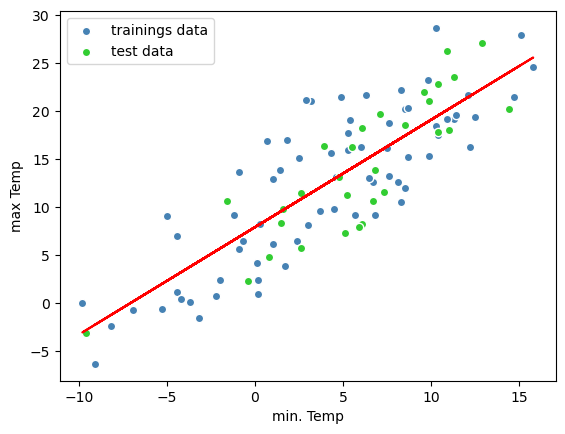

In [56]:
### Train und test data set
from sklearn.model_selection import train_test_split

# Let us take a sample again, this time with a sample size of n=100 
# that we split into a trainings data with 70% of the data and 
# and a test data with the 30% of the data

df_sample = df.sample(n=100, replace=False, random_state=1)

x = df_sample['temp_min'].values
y = df_sample['temp_max'].values

X = x.reshape((-1,1))

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =  0)

model = LinearRegression()
model.fit(X_train,y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

plt.scatter(X_train,y_train,c='steelblue', edgecolor = 'white',label = 'trainings data')
plt.scatter(X_test,y_test,c='limegreen', edgecolor = 'white', label = 'test data')
plt.legend(loc = 'upper left')
plt.xlabel('min. Temp')
plt.ylabel('max Temp')

# linear regression line: 
plt.plot(X_train,y_train_predict, color = 'red')



Great! You have implemented a machine leraning algorithm! You fitted a line on a data set, which can now be used for prediction of the maximal temperature by the knowldedge of the minimal temperature!

***

## 4.5. Residual analysis

A residuals of an observed value is the difference between the observed value and the estimated value $(y_i−\hat{y}_i)$. It is the leftover after fitting a model to data. The **sum of squared errors of prediction (SSE)**, also known as the sum of squared residuals or the error sum of squares is an indicator how well a model represents data.

If the absolute residuals, defined for observation $x_i$ as $y_i−\hat{y}_i$  are unusually large, it may be that the observation is from a different population, or that there was some error in making or recording the observation.

In addition we may analyse the residuals to check if linear regression assumptions are met. Regression residuals should be approximately normally-distributed; that is, the regression should explain the structure and whatever is left over should just be noise, caused by measurement errors or many small uncorrelated factors. The normality of residuals can be checked graphically by a plot of the residuals against the values of the predictor variable. In such a residual plot, the residuals should be randomly scattered about 0 and the variation around 0 should be equal.

If the assumptions for regression inferences are met, the following two conditions should hold (Weiss 2010):

A plot of the residuals (residual plot) against the values of the predictor variable should fall roughly in a horizontal band centered and symmetric about the x-axis.

A normal probability plot of the residuals should be roughly linear.

Text(0, 0.5, 'Residuals')

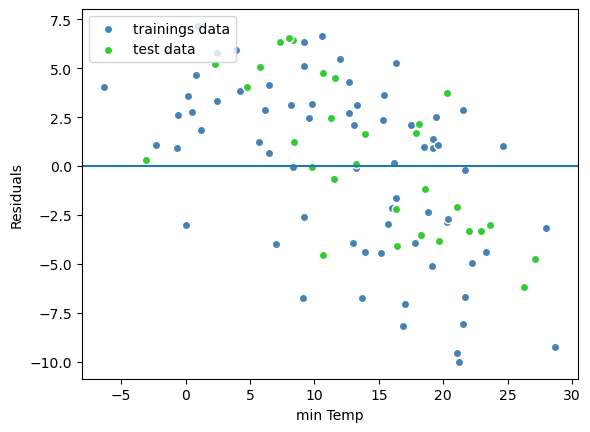

In [57]:
plt.scatter(y_train,y_train_predict - y_train, c='steelblue', edgecolor = 'white',label = 'trainings data')
plt.scatter(y_test,y_test_predict - y_test, c='limegreen', edgecolor = 'white', label = 'test data')
plt.axhline(y=0)
plt.legend(loc = 'upper left')
plt.xlabel('min Temp')
plt.ylabel('Residuals')

The residuals are fairly well distributed around zero indicating that the linear model assumptions for that model are fulfilled. 

> For an overview on different methods how to check the quality of the regression model in python, [click here.](https://towardsdatascience.com/how-do-you-check-the-quality-of-your-regression-model-in-python-fa61759ff685)

In [58]:
from sklearn.metrics import mean_squared_error

print('MSE train:', mean_squared_error(y_train,y_train_predict))
print('MSE test:', mean_squared_error(y_test,y_test_predict))

MSE train: 19.584438118151994
MSE test: 14.510185438570927


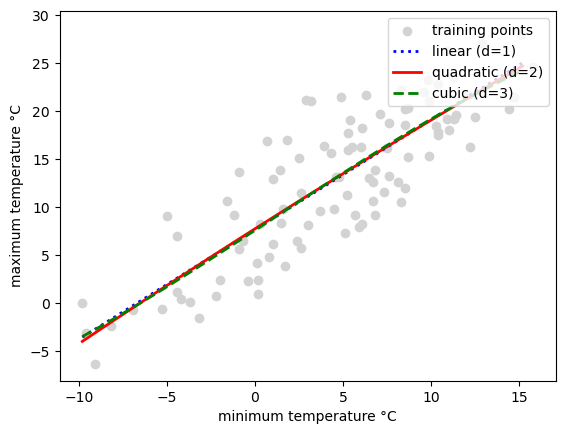

In [59]:
### linear fit, polynomial fit --> See chapter 10 of the Raschka and Mirjalili (2017)
## Can we fit polynomes?

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)


regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))


regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))



# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1)', 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2)',
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3)',
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('minimum temperature °C')
plt.ylabel('maximum temperature °C')
plt.legend(loc='upper right')

plt.show()




***

## 4.6  Exercises 

> **Exercise 2A**
> 
> Find the best regression line of the minimal temperature and the mean temperature of the weather station Dahlem.






In [60]:
### your code here ###

> **Exercise 2B**
>
> Next, we  import the module `scipy.stat` for Q-Q plots and plot all variables in a for-loop. Of course, you can also plot step py step.


In [61]:
### your code here ###

***

#### Extra: Machine Learning approach: 

> **Exercise 2C (just for fun, this is extra)**<br>
> a) Take again two variables the meteorological data set and devide the data into trainings and test data <br>
> b) Find either a linear model, a quadratic or a cubic (see the example code below) for your training data set and test if it fits! 

In [62]:
### your code here ###

***
# 5 Correlation and Regression

## 5.1. Measures of Relation Between Variables

In the last week we mainly focused on a single variable, describing a distribution and calculating summary statistics. Statistics that describe a single variable are referred to as univariate statistics. If we examine the relationship of two variables, we refer to bivariate statistics. If the relationships among several variables are simultaneously examined, we refer to multivariate statistics. Measures of relation provide a means of summarizing the size of the relation between two variables

### 5.1.1 The Covariance 

The [**covariance**](https://en.wikipedia.org/wiki/Covariance) is a measure of the joint variability of two variables. The covariance can take any value in the interval $(- \infty, \infty)$. The covariance is positive, if the greater/smaller values of one variable mainly correspond with the greater/smaller values of the other variable. The covariance is negative if the variables tend to show opposite behavior. If greater values of one variable mainly correspond to the lesser values of the other.

The covariance, $s_{xy}$, is calculated by the equation

$$s_{xy}=\frac{\sum_{i=1}^n(x_i-\bar x)(y_i-\bar y)}{n-1}$$

The normalized version of the covariance, is called correlation coefficient, which magnitude indicates the strength of a linear relation between two variables.


The **normalized version of the covariance**, is called  **correlation coefficient**, which magnitude indicates the strength of a linear relation between two variables.

***

### 5.1.2 Correlation

####  Pearson Correlation coefficient


Correlation is a commonly used method to examine the relationship between **quantitative variables**. The most commonly used statistic is the **linear correlation coefficient**, $r$, which is also known as the [**Pearson product moment correlation coefficient**](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) in honor of its developer, [Karl Pearson](https://en.wikipedia.org/wiki/Karl_Pearson). Is it given by

$$r = \frac{\sum_{i=1}^n(x_i- \bar x)(y_i - \bar y)}{\sqrt{\sum_{i=1}^n(x_i- \bar x)^2}\sqrt{\sum_{i=1}^n(y_i- \bar y)^2}}=\frac{s_{xy}}{s_x s_y}\text{,}$$

where $s_{xy}$ is the covariance of $x$ and $y$ and $s_x$ and $s_y$ the standard deviation of $x$ and $y$, respectively. By dividing by the sample standard deviations, $s_x$ and $s_y$, the linear correlation coefficient, $r$, becomes scale independent and takes values between $-1$ and $1$.


The linear correlation coefficient measures the strength of the linear relationship between two variables. If $r$ is close to $\pm 1$, the two variables are highly correlated and if plotted on a scatter plot, the data points cluster about a line. If $r$ is far from $\pm 1$, the data points are more widely scattered. If $r$ is near $0$, the data points are essentially scattered about a horizontal line indicating that there is almost no linear relationship between the variables.




<div>
<img src="4_regression_figures/Korrelationen.png" width="800"/>
</div>

An interesting property of $r$ is, that its sign reflects the slope of the linear relationship between two variables. A positive value of $r$ suggests that the variables are **positively linearly correlated**, indicating that $y$ tends to increase linearly as $x$ increases. A negative value of $r$ suggests that the variables are **negatively linearly correlated**, indicating that $y$ tends to decrease linearly as $x$ increases.

There is no unambiguous classification rule for the quantity of a linear relationship between two variables. However, the following table may serve a as rule of thumb how to address the numerical values of Pearson product moment correlation coefficient.

$$
\begin{array}{lc}
\hline
\ \text{Strong linear relationship} & r > 0.9 \\
\ \text{Medium linear relationship} & 0.7 < r \le 0.9\\
\ \text{Weak linear relationship} & 0.5 < r \le 0.7 \\
\ \text{No or doubtful linear relationship} & 0 < r \le 0.5 \\
\hline 
\end{array}
$$

Pearson's correlation assumes the variables to be roughly normally distributed and it is not robust in the presence of outliers.

In the section on LINEAR REGRESSION on May 4th we will discuss the coefficient of determination, $R^2$, a descriptive measure for the quality of linear models. There is a close relation between $R^2$ and the linear correlation coefficient, $r$. The coefficient of determination, $R^2$, equals the square of the linear correlation coefficient, $r$.


$$\text{coefficient of determination }(R^2) =r^2 $$

***

###  Pearson correlation coefficient: An example

In order to get some intuition we calculate the Pearson product moment correlation coefficient in an example. 

In [ ]:
# we consider the minimum and maximum temperature in Dahlem again. Are they correlated?

x = df.loc[ : , 'temp_min']
y = df.loc[ : , 'temp_max']
print(x)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.xlabel('minimum temperature in Dahlem')
plt.ylabel('max. temperature in Dahlem')

These are a lot of data points! Let's take a sample of `n=100` data points and look at the scatter plot again

In [ ]:
df_sample = df.sample(n=100, replace=False, random_state=1)

x_sample = df_sample.loc[ : , 'temp_min']
y_sample = df_sample.loc[ : , 'temp_max']

plt.xlabel('minimum temperature in Dahlem')
plt.ylabel('max. temperature in Dahlem')

plt.scatter(x_sample,y_sample)

It looks like a correlation of the minimum and maximum temperature. 


The scatter plot indicates that there exists an linear relationship between the two variables under consideration. 

For the sake of this exercise we calculate the linear correlation coefficient by hand at first, and then we apply the `pearsonr()` function in Python.

Recall the equation from above

$$r = \frac{\sum_{i=1}^n(x_i- \bar x)(y_i - \bar y)}{\sqrt{\sum_{i=1}^n(x_i- \bar x)^2}\sqrt{\sum_{i=1}^n(y_i- \bar y)^2}}=\frac{s_{xy}}{s_x s_y}$$

r is called **Pearsons correlation coefficient**. To calculate the mean and the square roots, we import the `numpy module`.

In [ ]:
import numpy as np 

x_bar = np.mean(x)
y_bar = np.mean(y)

sum((x - x_bar) * (y - y_bar)) / (np.sqrt(sum((x - x_bar)**2)) * np.sqrt(sum((y - y_bar)**2)))

As a sanity check we calculate the ration of the covariance of $x$ and $y$ and the standard deviation of $x$ and $y$: 

$$r =\frac{s_{xy}}{s_x s_y}$$

We use the numpy module to calculate the standard deviations `np.std()` and the covariance `np.cov(x,y)`.

But! Using numpy, `np.cov(a,b)` gives us the covariance matrix

$$\begin{pmatrix}
cov(a,a) &  cov(a,b) \\
cov(b,a) & cov(b,b) \\
\end{pmatrix}$$

Therefore, use `numpy.cov(a,b)[0][1]` for the matrix element cov(a,b)

In [ ]:
np.cov(x,y)[0][1]/(np.std(x)*np.std(y))

Finally, from the `module from scipy.stat`  we `import pearsonr` to calculate Pearson's correlation coefficient that we called r above. 

In [ ]:
from scipy.stats import pearsonr

corr = pearsonr(x,y)[0]
print(corr)

Perfect. The three calculations yield the exact same result! 

We may conclude, that there is a strong linear correlation between the minimum and maximum temperature at the weather station in Dahlem!

> **Exercise 3:** Take the data set of the weather station in Dahlem and calculate the correlation-coefficient after Pearson for different time dependent variables and provide the coefficients of determination!

In [ ]:
### your code here ###

***

Of course a correlation analysis is not restricted to two variables. Thanks to statistical software packages, we are able to conduct a pairwise correlation analysis for more than two variables. Let us first prepare the data set. For a better visualization experience we may draw again 100  randomly picked time steps of the data set. Then we select a number of variables to perform correlation analysis.


In [ ]:
df_sample = df.sample(n=100, replace=False, random_state=1)

The `corr()` function returns a nice table, also called **correlation matrix**,  with the pairwise Pearson's correlation coefficients. Obviously some variables contain missing values, denoted as `NaN`. 

In [ ]:
corrMatrix = df.corr()

corrMatrix

A table is nice representation for a correlation analysis, but a figure of course would improve the interpretability. Import the `seaborn` and the `matplotlib` packages for plotting the correlation matrices. The NaN data fields are empty. 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corrMatrix, annot=True,  fmt=".2f")
plt.show()

The temperature variables appear to be highly **positively correlated** and the relative humidity and the maximal temperature are examples that are **weak negatively correlated**.

> **Exercise 4**:
>
> Create a correlation plot for the original data (df) and one for the transformed data (df_transfo). Both should be displayed in one figure but 1 subplot each.  Are there differences between the two plots? Which variables are no longer or more strongly correlated? How can these differences be explained? 

In [ ]:
### your code here ###

##### solution

In [ ]:
df.corr()

In [ ]:
df_transfo.corr()

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))


sns.heatmap(df.corr(), annot=True,  fmt=".2f", ax = ax[0])
sns.heatmap(df_transfo.corr(), annot=True,  fmt=".2f", ax = ax[1])

ax[0].set_title("original data")
ax[1].set_title("log-transformed data")
plt.show()

***


###  Spearman's rank correlation coefficient

[**Spearman's rank correlation coefficient**](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient), also known as the Spearman's $\rho$ is a non-parametric rank correlation coefficient. It was developed by [Charles Spearman](https://en.wikipedia.org/wiki/Charles_Spearman) and is an alternative to Pearson's product moment correlation coefficient. The Spearman $\rho$ rank correlation coefficient is denoted by $r_s$ for sample data and by $\rho_s$ for population data (Mann 2012). The correlation coefficient assesses the monotonic relationship between two variables and ranges between $-1$ and $1$. It describes the linear correlation between the ranks of the data on variables $x$ and $y$. Spearman's correlation is high when the variables have a similar rank, and low when variables have a dissimilar rank.

To calculate $r_s$, the data for each variable, $x$ and $y$, is ranked separately. The difference between each pair of ranks and denote it by $d$. For a given bivariate sequence $(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)$ Spearman's $r_s$  is given by

$$r_s=1-\frac{6\sum_{i=1}^n (r_{xi}-r_{yi})^2}{n(n^2-1)}\text{,}$$
where $r_{xi}=Rank(x_i)$ , $r_{yi}= Rank(y_i)$ , and $n$ is the sample size.

In contrast to Pearson's linear correlation coefficient Spearman's linear coefficient is appropriate for both quantitative and ordinal variables. In addition rank based correlations are not dependent on the normal distributional assumption are more resistant to outliers (Schumann 2010).

***

###  Spearman's rank correlation coefficient: An example

Let us consider an example. The population of a community along a river believes that recent increases in peak discharge rates are due to deforestation by a logging company in recent years. We calculate Spearman's rank correlation coefficient to assess if there is a correlation between peak discharge (Durchfluss) and the faction of deforestation (Abholzung) area in the watershed (data modified after [McCuen 2003, p. 112](https://www.crcpress.com/Modeling-Hydrologic-Change-Statistical-Methods/McCuen/p/book/9781566706001)).

$$
\begin{array}{lcc}
\hline
\ \text{Year} & \text{Discharge (m}^3 \text{s}^{-1}) & \text{Logging area (\%)} \\
\hline 
\ 1982 & 227 & 53  \\
\ 1983 & 249 & 56  \\
\ 1984 & 210 & 57 \\
\ 1985 & 190 & 58  \\
\ 1986 & 314 & 55  \\
\ 1987 & 345 & 54 \\
\ 1988 & 161 & 51  \\
\ 1988 & 266 & 50  \\
\ 1989 & 402 & 49 \\
\ 1990 & 215 & 57  \\
\ 1991 & 164 & 46  \\
\ 1992 & 405 & 44 \\
\ 1993 & 328 & 43 \\
\ 1994 & 294 & 42 \\
\hline \\
\end{array}
$$

Let us construct our data vectors. We assign the years to the variable `year`, the discharge values to the variable `Q` and the logging area to the variable `logged`.


In [ ]:
year = np.array([1982,1983,1984,1985,1986,1987,1988,1988,1989,1990,1991,1992,1993,1994])
Q = np.array([227, 249, 210, 190, 314, 345, 161, 266, 402, 215, 164, 405, 328, 294])
logged = np.array([53, 56, 57, 58, 55, 54, 51, 50, 49, 47, 46, 44, 43, 42])

print('Year = ',year)
print('Q = ',Q)
print('logged =',logged)

> [**Spearman's rank correlation coefficient**](https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Descriptive-Statistics/Measures-of-Relation-Between-Variables/Correlation/index.html)
> 
> Spearman's  ρ  is a non-parametric rank correlation coefficient. It was developed by Charles Spearman and is an alternative to the Pearson product moment correlation coefficient. The Spearman's rank correlation coefficient is denoted by $r_{s}$ for sample data and by $ρ_{s}$ for population data (Mann 2012). The correlation coefficient assesses the monotonic relationship between two variables and ranges between  $−1$ and $1$. It describes the linear correlation between the ranks of the data of variables x and y. Spearman's correlation is high when the variables have a similar rank and low when variables have a dissimilar rank. In contrast to Pearson's linear correlation coefficient Spearman's linear correlation coefficient is appropriate for both, quantitative and ordinal, variables. In addition, rank based correlations are not dependent on the assumption of a normal distribution and are more resistant to outliers (Schumann 2010).

First we calculate **Spearman's rank correlation coefficient** by hand. Recall the equation

$$r_s=1-\frac{6\sum_{i=1}^n (r_{xi}-r_{yi})^2}{n(n^2-1)}\text{,}$$

where $r_{xi}=Rank(x_i)$ , $r_{yi}= Rank(y_i)$ , and $n$ is the sample size. 

Next, we create a `pandas DataFrame` with the above assigned values:

In [ ]:
# The vectors year, Q and logged need to have the same length to create
# data frame

n = len(Q)
m = len(year)
s = len(logged)
print(n,m,s)


# create a new pandas data frame: 
d = {'Year' : year, 'Q': Q, 'logged': logged}
df_ex = pd.DataFrame(data = d)

df_ex

We apply the `rank()` function to calculate the rank for the values of each variable. Then, we calculate **Spearman's rank correlation coefficient** by hand:

In [ ]:
r_xi = df_ex['Q'].rank()
r_yi = df_ex['logged'].rank()

rs = 1 - ((6*sum((r_xi-r_yi)**2))/(n*(n**2-1)))
print(rs)

As Spearman’s rank correlation coefficient is nothing else but Pearson’s linear correlation coefficient on the ranked data. The result the following code cell should equal the previous results.

Alternatively to the above calculation, we load the funktion `spearmanr`of the modue `scipy.stats`:


In [ ]:
from scipy.stats import spearmanr

corr = spearmanr(Q,logged)[0]
print(corr)

Perfect, we got the same result by all three calculations! The results indicate that there is no to a weak negative correlation between peak discharge and logging area. In other words, the discharge tends to decrease when the logging area increases. Thus, the perception of the population can not be confirmed by out statistical analysis.

***

### Spearman's rank correlation coefficient: A second example

Analogously to the Pearson correlation, we can calculate the correlation matrix with respect to the Spearman correlation:

In [ ]:
corrMatrix_spearman = df_transfo.corr(method = 'spearman')
corrMatrix_spearman

In [ ]:
sns.heatmap(corrMatrix_spearman, annot=True)
plt.show()


***


> **Exercise (Recall) 5**: 
>1. How are the Pearson correlation coefficient and the Spearman rank correlation coefficient defined? 
>2. Both corrrelations have values between -1 and 1. In which case is the coefficient negative? 
>3. Sketch an example (by hand), where the Pearson Correlation Coefficient is larger than the Spearman rank correlation!



In [ ]:
### your code here ###



> **Exercise 6**:
> Calculate the correlation coefficient matrix of the original, not-transformed mateorological data set using the Spearman-rank-coefficient.

In [ ]:
### your code here ###

> **Exercise 7: Ein Beispiel**
>
> In einem Einzugsgebiet im Süden Brandenburgs wurden an einer Grundwassermessstelle an verschiedenen Tagen der Abfluss (Q), die elektrische Leitfähigkeit (LF) und die Konzentrationen verschiedener chemischer Stoffe wie Sulfat (SO4), Calcium (CA) und Magnesium (MG) gemessen.  Es ist bekannt, dass in dem Gebiet früher Braunkohle abgebaut wurde und das im Boden enthaltene Pyrit (Eisendisulfid, FeS2) dem Luftsauerstoff ausgesetzt ist und oxidiert. Dabei können erhebliche Mengen an Säure, Eisen (Fe3+) und Sulfat entstehen, die die Trinkwasserqualität gefährden. Im Gebiet befinden sich auch landwirtschaftlich genutzte Flächen. Durch verschiedene Düngemittel, die schwefelhaltige Verbindungen mit Phosphor (PO43-) oder Nitrat (NO3), kann auch hier das Grundwasser durch Sulfat belastet sein. 
>
> **Interpretieren Sie die Korrelationsmatrix aus Sicht des Grundwasserschutzes!  Entscheide, ob das Grundwasser durch den ehemaligen Braunkohleabbau (Fe3+, SO4 2-) oder durch die Landwirtschaft (PO43-, NO3, SO4 2-) belastet ist.**
>


|         | Q     | LF    | NO3   | SO4  | Ca   | Mg  | PO4 2-  | Fe3+ |
|---------|-------|-------|-------|------|------|-----|---------|------|
| Q       | 1     |       |       |      |      |     |         |      |
| LF      | -0,87 | 1     |       |      |      |     |         |      |
| NO3     | 0,61  | -0,84 | 1     |      |      |     |         |      |
| SO4     | -0,74 | 0,88  | -0,36 | 1    |      |     |         |      |
| Ca      | -0,56 | 0,73  | -0,67 | 0,69 | 1    |     |         |      |
| Mg      | -0,44 | 0,7   | -0,62 | 0,62 | 0,38 | 1   |         |      |
| PO4 2-  | -0,7  | 0,81  | 0,86  | 0,31 | 0,76 |   0,71  | 1       |      |
| Fe3+    | -0,65 | 0,77  | -0,76 | 0,84 | 0,71 | 0,7 | -0,81   | 1    |

*(inspiriert durch Möller 2002)*

#### solution


|         | Q     | LF    | NO3   | SO4  | Ca   | Mg  | PO4 2-  | Fe3+ |
|---------|-------|-------|-------|------|------|-----|---------|------|
| Q       | 1     |       |       |      |      |     |         |      |
| LF      | -0,87 | 1     |       |      |      |     |         |      |
| NO3     | 0,61  | -0,84 | 1     |      |      |     |         |      |
| SO4     | -0,74 | 0,88  | **-0,36** | 1    |      |     |         |      |
| Ca      | -0,56 | 0,73  | -0,67 | 0,69 | 1    |     |         |      |
| Mg      | -0,44 | 0,7   | -0,62 | 0,62 | 0,38 | 1   |         |      |
| PO4 2-  | -0,7  | 0,81  | 0,86  | **0,31** | 0,76 |     | 1       |      |
| Fe3+    | -0,65 | 0,77  | -0,76 | **0,84** | 0,71 | 0,7 | -0,81   | 1    |


> Korrelation zwischen Fe3+ und SO4 am höchsten --> also vermutlich verlaufen die Fließpfade durch ehem. Braunkohleabbaugebiete oder werden durch diese beeinfliusst.